Note: if a data point could belong to multipe categories i'd be facing a multilabel, multiclass classification

In [1]:
from keras.datasets import reuters
import numpy as np

np_old_load = np.load

np.load = lambda *a,**k: np_old_load(*a, allow_pickle = True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

np.load = np_old_load
print(len(train_data),len(test_data))

Using TensorFlow backend.


8982 2246


Decoding newswire back to text

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key ) for (key, value) in word_index.items()])
' '.join([reverse_word_index.get(i -3, '?') for i in train_data[9]])

'? lt aramco corp has accepted japanese ? to lift a higher proportion of arab heavy crude oil under term contracts in july oil industry sources said japanese companies requested a ratio of 80 pct arab heavy to 20 pct arab light under a term contract agreement with aramco for 100 000 barrels per day the sources said the contractual ratio is 30 pct heavy crude to 70 pct light japanese demand for heavy crude oil has increased substantially since the all japan ? union ceased ? into the northern mideast gulf last month causing problems with liftings of heavy kuwait and ? crudes reuter 3'

In [5]:
len(train_data),len(train_data[1])

(8982, 56)

# Preparing the data
encoding the data

In [4]:
import numpy as np

#one - hot - vector
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

encoding the labels a.k.a categorical encoding

In [5]:
def to_one_hot(labels, dimension = 9):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

we can also use a built in function for this aswell

In [6]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Building your Network

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


Compiling the model

In [8]:
model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics =['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [10]:
x_train.shape

(8982, 10000)

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 83us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.4581 - acc: 0.9

Plotting the training and validation loss

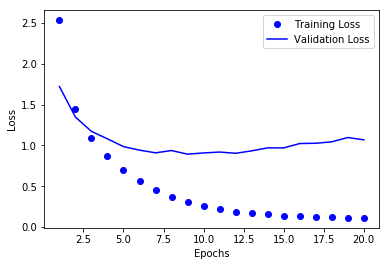

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plot training and validation accuracy

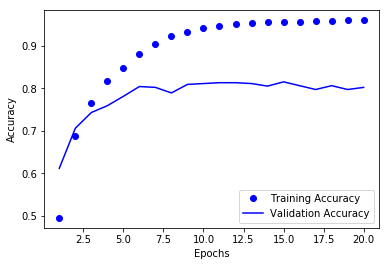

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Retraining a model from scratch

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics =['accuracy'])
history = model.fit(x_train,
                    one_hot_train_labels,
                    epochs=9,
                    batch_size = 512,
                    )

Epoch 1/9
8982/8982 [==============================] - 1s 72us/step - loss: 2.6673 - acc: 0.5235
Epoch 2/9
8982/8982 [==============================] - 1s 56us/step - loss: 1.4144 - acc: 0.7130
Epoch 3/9
8982/8982 [==============================] - 1s 62us/step - loss: 1.0430 - acc: 0.7833
Epoch 4/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.8231 - acc: 0.8271
Epoch 5/9
8982/8982 [==============================] - 1s 58us/step - loss: 0.6563 - acc: 0.8577
Epoch 6/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.5294 - acc: 0.8854
Epoch 7/9
8982/8982 [==============================] - 0s 54us/step - loss: 0.4235 - acc: 0.9115
Epoch 8/9
8982/8982 [==============================] - 0s 55us/step - loss: 0.3474 - acc: 0.9276
Epoch 9/9
8982/8982 [==============================] - 0s 55us/step - loss: 0.2933 - acc: 0.9365


In [19]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 69us/step


In [21]:
print(results)
model.metrics_names

[0.9475042410228046, 0.7934105075159353]


['loss', 'acc']

0.8 accuracy is better than chance
Example

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = test_labels_copy == test_labels
np.float(np.sum(hits_array))/len(hits_array)

0.19412288512911843

The above random classifier is only 19 %

Predictions 

In [26]:
predictions = model.predict(x_test)

In [36]:
index = 2211
np.argmax(predictions[index]), test_labels[index]

(3, 3)

In [46]:
y1 = np.array(train_labels)
type(y1)

numpy.ndarray

In [47]:
type(train_labels)

numpy.ndarray

In [49]:
def model_exe(units, layerz):
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu', input_shape = (10000,)))
    for layer in range(layerz):
        model.add(layers.Dense(units, activation = 'relu'))
    model.add(layers.Dense(46, activation = 'softmax'))
    model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics =['accuracy'])
    history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
    final = len(history.history['val_acc']) -1
    return history.history['val_acc'][final]

In [50]:
model_exe(128, 1)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 92us/step - loss: 2.1589 - acc: 0.5719 - val_loss: 1.3984 - val_acc: 0.6850
Epoch 2/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.1391 - acc: 0.7557 - val_loss: 1.1150 - val_acc: 0.7630
Epoch 3/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.7893 - acc: 0.8330 - val_loss: 0.9991 - val_acc: 0.7940
Epoch 4/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.5678 - acc: 0.8846 - val_loss: 0.9556 - val_acc: 0.7940
Epoch 5/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.4263 - acc: 0.9094 - val_loss: 0.8996 - val_acc: 0.8190
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.3178 - acc: 0.9331 - val_loss: 0.9028 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 74us/step - loss: 0.2556 - acc: 0.9434 - val_loss: 0.8883 - val_acc: 0.8240
Epoch 8

0.8010000076293945

In [51]:
model_exe(128, 4)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 105us/step - loss: 2.3470 - acc: 0.4315 - val_loss: 1.5320 - val_acc: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.3130 - acc: 0.6999 - val_loss: 1.3167 - val_acc: 0.6820
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.0022 - acc: 0.7556 - val_loss: 1.1522 - val_acc: 0.7270
Epoch 4/20
7982/7982 [==============================] - 1s 74us/step - loss: 0.7647 - acc: 0.8138 - val_loss: 1.0906 - val_acc: 0.7640
Epoch 5/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.5865 - acc: 0.8513 - val_loss: 1.2563 - val_acc: 0.7300
Epoch 6/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.4664 - acc: 0.8815 - val_loss: 1.0466 - val_acc: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.3743 - acc: 0.9095 - val_loss: 1.1197 - val_acc: 0.7830
Epoch 

0.7929999966621399

In [52]:
model_exe(128, 8)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 120us/step - loss: 2.5673 - acc: 0.3657 - val_loss: 1.7370 - val_acc: 0.5400
Epoch 2/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.7035 - acc: 0.5341 - val_loss: 1.6098 - val_acc: 0.5550
Epoch 3/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.4342 - acc: 0.6200 - val_loss: 1.4362 - val_acc: 0.6670
Epoch 4/20
7982/7982 [==============================] - 1s 76us/step - loss: 1.2405 - acc: 0.6729 - val_loss: 1.3257 - val_acc: 0.6860
Epoch 5/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.0834 - acc: 0.7167 - val_loss: 1.2709 - val_acc: 0.7030
Epoch 6/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.9242 - acc: 0.7516 - val_loss: 1.2842 - val_acc: 0.7040
Epoch 7/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.8670 - acc: 0.7643 - val_loss: 1.2072 - val_acc: 0.7210
Epoch 

0.7399999985694885

In [53]:
model_exe(64, 4)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 96us/step - loss: 2.6389 - acc: 0.4201 - val_loss: 1.7627 - val_acc: 0.5690
Epoch 2/20
7982/7982 [==============================] - 0s 55us/step - loss: 1.5424 - acc: 0.6247 - val_loss: 1.4302 - val_acc: 0.6750
Epoch 3/20
7982/7982 [==============================] - 0s 54us/step - loss: 1.2348 - acc: 0.7134 - val_loss: 1.2922 - val_acc: 0.7010
Epoch 4/20
7982/7982 [==============================] - 0s 55us/step - loss: 1.0224 - acc: 0.7570 - val_loss: 1.2268 - val_acc: 0.7220
Epoch 5/20
7982/7982 [==============================] - 0s 54us/step - loss: 0.8673 - acc: 0.8012 - val_loss: 1.1327 - val_acc: 0.7660
Epoch 6/20
7982/7982 [==============================] - 0s 54us/step - loss: 0.6875 - acc: 0.8378 - val_loss: 1.1215 - val_acc: 0.7500
Epoch 7/20
7982/7982 [==============================] - 0s 54us/step - loss: 0.6123 - acc: 0.8444 - val_loss: 1.1195 - val_acc: 0.7690
Epoch 8

0.7829999904632569

In [55]:
model_exe(256, 3)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 135us/step - loss: 2.0593 - acc: 0.5395 - val_loss: 1.3249 - val_acc: 0.6800
Epoch 2/20
7982/7982 [==============================] - 1s 92us/step - loss: 1.0653 - acc: 0.7496 - val_loss: 1.0403 - val_acc: 0.7610
Epoch 3/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.7068 - acc: 0.8373 - val_loss: 0.9275 - val_acc: 0.8000
Epoch 4/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.4977 - acc: 0.8904 - val_loss: 0.9051 - val_acc: 0.8170
Epoch 5/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.3279 - acc: 0.9208 - val_loss: 0.8825 - val_acc: 0.8210
Epoch 6/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.2180 - acc: 0.9464 - val_loss: 1.1715 - val_acc: 0.7710
Epoch 7/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.2029 - acc: 0.9481 - val_loss: 0.9208 - val_acc: 0.8280
Epoch 

0.8129999957084656

In [ ]:
model_exe(256, 3)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 144us/step - loss: 2.2126 - acc: 0.4684 - val_loss: 1.3813 - val_acc: 0.6830
Epoch 2/20
7982/7982 [==============================] - 1s 94us/step - loss: 1.1903 - acc: 0.7191 - val_loss: 1.2256 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.8900 - acc: 0.7864 - val_loss: 1.0417 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.6032 - acc: 0.8515 - val_loss: 1.1902 - val_acc: 0.7430
Epoch 5/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.4396 - acc: 0.8951 - val_loss: 0.9518 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.4386 - acc: 0.8909 - val_loss: 0.9121 - val_acc: 0.8190
Epoch 7/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.2051 - acc: 0.9470 - val_loss: 1.0259 - val_acc: 0.8080
Epoch 